<a href="https://colab.research.google.com/github/aquilasamuel/MINERACAO_DE_DADOS/blob/main/base_pivot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df_base1 = pd.read_csv('/content/drive/MyDrive/base_6m_att.csv')
df_base1

,Unnamed: 0,CODIGO,NOTAOPERADOR,PLANILHA,CANAL,GRUPO,PERGUNTA,RESPOSTA,DATAMONITORIA
0,87,36219179,100,RIDER | Written Channels | v.1 (11/22),TICKET,ABERTURA,Chamou o usuario por seu nome_,Conforme,2022-12-02
1,88,36219179,100,RIDER | Written Channels | v.1 (11/22),TICKET,ABERTURA,Se apresentou corretamente (se aplicavel)_,Conforme,2022-12-02
2,89,36219179,100,RIDER | Written Channels | v.1 (11/22),TICKET,IDENTIFICACAO DO CONTATO,Fez as perguntas corretamente para identificar...,Conforme,2022-12-02
3,90,36219179,100,RIDER | Written Channels | v.1 (11/22),TICKET,ATITUDE DE SERVICO,Utilizou palavras positivas (macros nao serao ...,Conforme,2022-12-02
4,91,36219179,100,RIDER | Written Channels | v.1 (11/22),TICKET,ATITUDE DE SERVICO,Se mostrou solicito e com vontade de ajudar o ...,Conforme,2022-12-02
...,...,...,...,...,...,...,...,...,...
1271965,2271089,36982331,100,ANTIFRAUDE | CASH LOAN | (03/23),TICKET,DETALHES DO CLIENTE,Foto da frente do documento,Conforme,2023-04-03
1271966,2271090,36982331,100,ANTIFRAUDE | CASH LOAN | (03/23),TICKET,DETALHES DO CLIENTE,Foto do verso do documento,Conforme,2023-04-03
1271967,2271091,36982331,100,ANTIFRAUDE | CASH LOAN | (03/23),TICKET,DETALHES DO CLIENTE,Selfie com o documento (apenas RG),Conforme,2023-04-03
1271968,2271092,36982331,100,ANTIFRAUDE | CASH LOAN | (03/23),TICKET,DETALHES DO CLIENTE,Reconhecimento facial em tempo real,Conforme,2023-04-03


In [ ]:
df_base1 = df_base1.drop(df_base1[df_base1['CANAL'] == 'HIBRIDO'].index)

In [ ]:
df1 = df_base1[['CODIGO','PERGUNTA', 'RESPOSTA']].copy()
df2 = df_base1.drop(['PERGUNTA', 'RESPOSTA', 'GRUPO'], axis=1)

In [ ]:
df1['RESPOSTA'] = df1['RESPOSTA'].replace('Nao Conforme', 'NC')

In [ ]:
df1.RESPOSTA.unique()

array(['Conforme', 'NC'], dtype=object)

In [ ]:
index_columns = ['CODIGO']  # Colunas usadas como índices
pivot_column = 'PERGUNTA'

In [ ]:
#df1.drop_duplicates(subset=['CODIGO'], keep='first', inplace=True)

In [ ]:
pivoted_df = df1.pivot_table(index=index_columns, columns=pivot_column, values='RESPOSTA', aggfunc=lambda x: x.iloc[0])
pivoted_df

PERGUNTA,"A Macro pede no PC, mas registro de atendimento fi",A imagem contem mais de uma pessoa,A macro esta desatualizada,"A macro esta no CS, mas nao foi utilizada",A macro nao esta no CS,A macro nao responde a duvida do usuario,A macro possui erros de gramatica,Abandonou o chat sem justificativa,Abertura,Abertura e Encerramento,...,Upload do avatar,Uso de Simbolos - Nome do item,Utilizou espacamento corretamente_,Utilizou palavras positivas (macros nao serao cons,Utilizou palavras positivas_,Utilizou tom de voz animado e vontade de ajudar o,"Utilizou tom de voz rispido ou grosseiro, foi rude","Utilizou vocabulario simples, sem utilizar termos",Validade,Vinculo Suspeito - Identificou vinculo entre as pa
CODIGO,,,,,,,,,,,,,,,,,,,,,
36057037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Conforme,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36057592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Conforme,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36057724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Conforme,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36057943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Conforme,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36058182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Conforme,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37159926,NaN,NaN,Conforme,Conforme,Conforme,Conforme,Conforme,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Conforme,Conforme,Conforme,Conforme,NaN,NaN
37159932,NaN,NaN,Conforme,Conforme,Conforme,Conforme,Conforme,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Conforme,Conforme,Conforme,Conforme,NaN,NaN
37159953,NaN,NaN,Conforme,Conforme,Conforme,Conforme,Conforme,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Conforme,Conforme,Conforme,Conforme,NaN,NaN


In [ ]:
pivoted_df.fillna(-1, inplace=True)
pivoted_df

PERGUNTA,"A Macro pede no PC, mas registro de atendimento fi",A imagem contem mais de uma pessoa,A macro esta desatualizada,"A macro esta no CS, mas nao foi utilizada",A macro nao esta no CS,A macro nao responde a duvida do usuario,A macro possui erros de gramatica,Abandonou o chat sem justificativa,Abertura,Abertura e Encerramento,...,Upload do avatar,Uso de Simbolos - Nome do item,Utilizou espacamento corretamente_,Utilizou palavras positivas (macros nao serao cons,Utilizou palavras positivas_,Utilizou tom de voz animado e vontade de ajudar o,"Utilizou tom de voz rispido ou grosseiro, foi rude","Utilizou vocabulario simples, sem utilizar termos",Validade,Vinculo Suspeito - Identificou vinculo entre as pa
CODIGO,,,,,,,,,,,,,,,,,,,,,
36057037,-1,-1,-1,-1,-1,-1,-1,-1,Conforme,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
36057592,-1,-1,-1,-1,-1,-1,-1,-1,Conforme,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
36057724,-1,-1,-1,-1,-1,-1,-1,-1,Conforme,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
36057943,-1,-1,-1,-1,-1,-1,-1,-1,Conforme,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
36058182,-1,-1,-1,-1,-1,-1,-1,-1,Conforme,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37159926,-1,-1,Conforme,Conforme,Conforme,Conforme,Conforme,-1,-1,-1,...,-1,-1,-1,-1,Conforme,Conforme,Conforme,Conforme,-1,-1
37159932,-1,-1,Conforme,Conforme,Conforme,Conforme,Conforme,-1,-1,-1,...,-1,-1,-1,-1,Conforme,Conforme,Conforme,Conforme,-1,-1
37159953,-1,-1,Conforme,Conforme,Conforme,Conforme,Conforme,-1,-1,-1,...,-1,-1,-1,-1,Conforme,Conforme,Conforme,Conforme,-1,-1


In [ ]:
df2 = df2.drop('Unnamed: 0', axis=1)


In [ ]:
df2 = df2.drop_duplicates(subset='CODIGO', keep='first')
df2

,CODIGO,NOTAOPERADOR,PLANILHA,CANAL,DATAMONITORIA
0,36219179,100,RIDER | Written Channels | v.1 (11/22),TICKET,2022-12-02
40,36219160,100,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-12-02
55,36221153,100,B2B | LIVE CHAT | v.1 (11/22),CHAT,2022-12-02
80,36221006,100,DRIVER | PHONE | v.1 (11/22),VOZ,2022-12-02
129,36220996,100,B2B | LIVE CHAT | v.1 (11/22),CHAT,2022-12-02
...,...,...,...,...,...
1271933,36982783,100,ANTI FRAUDE | KYC|,TICKET,2023-04-03
1271940,36982743,100,ANTI FRAUDE | KYC|,TICKET,2023-04-03
1271947,36982668,100,ANTI FRAUDE | KYC|,TICKET,2023-04-03
1271954,36982620,100,ANTI FRAUDE | KYC|,TICKET,2023-04-03


In [ ]:
df_concatenado = pd.merge(pivoted_df, df2, on='CODIGO')
df_concatenado

<ipython-input-36-7e50507f76b7>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_concatenado = pd.merge(pivoted_df, df2, on='CODIGO')


,CODIGO,"A Macro pede no PC, mas registro de atendimento fi",A imagem contem mais de uma pessoa,A macro esta desatualizada,"A macro esta no CS, mas nao foi utilizada",A macro nao esta no CS,A macro nao responde a duvida do usuario,A macro possui erros de gramatica,Abandonou o chat sem justificativa,Abertura,...,Utilizou palavras positivas_,Utilizou tom de voz animado e vontade de ajudar o,"Utilizou tom de voz rispido ou grosseiro, foi rude","Utilizou vocabulario simples, sem utilizar termos",Validade,Vinculo Suspeito - Identificou vinculo entre as pa,NOTAOPERADOR,PLANILHA,CANAL,DATAMONITORIA
0,36057037,-1,-1,-1,-1,-1,-1,-1,-1,Conforme,...,-1,-1,-1,-1,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01
1,36057592,-1,-1,-1,-1,-1,-1,-1,-1,Conforme,...,-1,-1,-1,-1,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01
2,36057724,-1,-1,-1,-1,-1,-1,-1,-1,Conforme,...,-1,-1,-1,-1,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01
3,36057943,-1,-1,-1,-1,-1,-1,-1,-1,Conforme,...,-1,-1,-1,-1,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01
4,36058182,-1,-1,-1,-1,-1,-1,-1,-1,Conforme,...,-1,-1,-1,-1,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26192,37159926,-1,-1,Conforme,Conforme,Conforme,Conforme,Conforme,-1,-1,...,Conforme,Conforme,Conforme,Conforme,-1,-1,97,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29
26193,37159932,-1,-1,Conforme,Conforme,Conforme,Conforme,Conforme,-1,-1,...,Conforme,Conforme,Conforme,Conforme,-1,-1,97,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29
26194,37159953,-1,-1,Conforme,Conforme,Conforme,Conforme,Conforme,-1,-1,...,Conforme,Conforme,Conforme,Conforme,-1,-1,100,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29
26195,37159959,-1,-1,Conforme,Conforme,Conforme,Conforme,Conforme,-1,-1,...,Conforme,Conforme,Conforme,Conforme,-1,-1,100,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29


In [ ]:
df_concatenado.to_csv('/content/drive/MyDrive/base_pivotada.csv')

In [ ]:
df_concatenado.replace('Conforme', 0, inplace=True);
df_concatenado.loc[df_concatenado['A Macro pede no PC, mas registro de atendimento fi'] == 'NC', 'A Macro pede no PC, mas registro de atendimento fi'] = 10;
df_concatenado.loc[df_concatenado['A imagem contem mais de uma pessoa'] == 'NC', 'A imagem contem mais de uma pessoa'] = 25;
df_concatenado.loc[df_concatenado['A macro esta desatualizada'] == 'NC', 'A macro esta desatualizada'] = 10;
df_concatenado.loc[df_concatenado['A macro esta no CS, mas nao foi utilizada'] == 'NC', 'A macro esta no CS, mas nao foi utilizada'] = 10;
df_concatenado.loc[df_concatenado['A macro nao esta no CS'] == 'NC', 'A macro nao esta no CS'] = 20;
df_concatenado.loc[df_concatenado['A macro nao responde a duvida do usuario'] == 'NC', 'A macro nao responde a duvida do usuario'] = 10;
df_concatenado.loc[df_concatenado['A macro possui erros de gramatica'] == 'NC', 'A macro possui erros de gramatica'] = 10;
df_concatenado.loc[df_concatenado['Abandonou o chat sem justificativa'] == 'NC', 'Abandonou o chat sem justificativa'] = 100;
df_concatenado.loc[df_concatenado['Abertura'] == 'NC', 'Abertura'] = 5;
df_concatenado.loc[df_concatenado['Abertura e Encerramento'] == 'NC', 'Abertura e Encerramento'] = 10;
df_concatenado.loc[df_concatenado['Acao de Bloqueio - Deixou de fazer qualquer bloque'] == 'NC', 'Acao de Bloqueio - Deixou de fazer qualquer bloque'] = 10;
df_concatenado.loc[df_concatenado['Adaptacao da linguagem'] == 'NC', 'Adaptacao da linguagem'] = 10;
df_concatenado.loc[df_concatenado['Adaptacao de Macro (Caso Necessario)'] == 'NC', 'Adaptacao de Macro (Caso Necessario)'] = 5;
df_concatenado.loc[df_concatenado['Adaptou a velocidade da fala para que o usuario en'] == 'NC', 'Adaptou a velocidade da fala para que o usuario en'] = 5;
df_concatenado.loc[df_concatenado['Analista compartilhou informacoes confidencias_'] == 'NC', 'Analista compartilhou informacoes confidencias_'] = 100;
df_concatenado.loc[df_concatenado['Analista ignora contatos anteriores_'] == 'NC', 'Analista ignora contatos anteriores_'] = 100;
df_concatenado.loc[df_concatenado['Analista prejudica imagem da empresa_'] == 'NC', 'Analista prejudica imagem da empresa_'] = 100;
df_concatenado.loc[df_concatenado['Aprovacao'] == 'NC', 'Aprovacao'] = 100;
df_concatenado.loc[df_concatenado['Aprovacao Indevida da Self'] == 'NC', 'Aprovacao Indevida da Self'] = 100;
df_concatenado.loc[df_concatenado['Aprovacao Indevida do RG'] == 'NC', 'Aprovacao Indevida do RG'] = 100;
df_concatenado.loc[df_concatenado['Atencao e Concentracao'] == 'NC', 'Atencao e Concentracao'] = 10;
df_concatenado.loc[df_concatenado['Ausencia'] == 'NC', 'Ausencia'] = 7;
df_concatenado.loc[df_concatenado['Avisou o usuario que ira coloca-lo em espera_'] == 'NC', 'Avisou o usuario que ira coloca-lo em espera_'] = 8;
df_concatenado.loc[df_concatenado['CRM Remark - Formata as opcoes, de modo a nao conf'] == 'NC', 'CRM Remark - Formata as opcoes, de modo a nao conf'] = 6;
df_concatenado.loc[df_concatenado['Campos Importantes'] == 'NC', 'Campos Importantes'] = 10;
df_concatenado.loc[df_concatenado['Campos Major'] == 'NC', 'Campos Major'] = 100;
df_concatenado.loc[df_concatenado['Caracteres'] == 'NC', 'Caracteres'] = 3;
df_concatenado.loc[df_concatenado['Caracteres - Ingredientes e Metodos de Preparacao'] == 'NC', 'Caracteres - Ingredientes e Metodos de Preparacao'] = 4;
df_concatenado.loc[df_concatenado['Categoria'] == 'NC', 'Categoria'] = 5;
df_concatenado.loc[df_concatenado['Causou prejuizo financeiro'] == 'NC', 'Causou prejuizo financeiro'] = 100;
df_concatenado.loc[df_concatenado['Chamou o usuario por seu nome_'] == 'NC', 'Chamou o usuario por seu nome_'] = 5;
df_concatenado.loc[df_concatenado['Clareza'] == 'NC', 'Clareza'] = 15;
df_concatenado.loc[df_concatenado['Cometeu erros  de pontuacao e maiusculizacao_ (max'] == 'NC', 'Cometeu erros  de pontuacao e maiusculizacao_ (max'] = 5;
df_concatenado.loc[df_concatenado['Cometeu erros de pontuacao e maiusculizacao_ (max '] == 'NC', 'Cometeu erros de pontuacao e maiusculizacao_ (max '] = 5;
df_concatenado.loc[df_concatenado['Cometeu erros de pontuacao e maiusculizacao_(se ap'] == 'NC', 'Cometeu erros de pontuacao e maiusculizacao_(se ap'] = 10;
df_concatenado.loc[df_concatenado['Compartilhou informacoes confidenciais'] == 'NC', 'Compartilhou informacoes confidenciais'] = 100;
df_concatenado.loc[df_concatenado['Comportamento Financeiro - Identificou indicio de '] == 'NC', 'Comportamento Financeiro - Identificou indicio de '] = 6;
df_concatenado.loc[df_concatenado['Comportamento da Corrida - Identificou indicio de '] == 'NC', 'Comportamento da Corrida - Identificou indicio de '] = 6;
df_concatenado.loc[df_concatenado['Comunicacao'] == 'NC', 'Comunicacao'] = 5;
df_concatenado.loc[df_concatenado['Conducao'] == 'NC', 'Conducao'] = 5;
df_concatenado.loc[df_concatenado['Conduta Anti Profissional'] == 'NC', 'Conduta Anti Profissional'] = 100;
df_concatenado.loc[df_concatenado['Configuracoes de operacao do Estabelecimento'] == 'NC', 'Configuracoes de operacao do Estabelecimento'] = 10;
df_concatenado.loc[df_concatenado['Confirma qual e a solicitacao do usuario (quando a'] == 'NC', 'Confirma qual e a solicitacao do usuario (quando a'] = 8;
df_concatenado.loc[df_concatenado['Confirma qual e a solicitacao do usuario_'] == 'NC', 'Confirma qual e a solicitacao do usuario_'] = 8;
df_concatenado.loc[df_concatenado['Conhecimento do Produto'] == 'NC', 'Conhecimento do Produto'] = 15;
df_concatenado.loc[df_concatenado['Cordialidade'] == 'NC', 'Cordialidade'] = 10;
df_concatenado.loc[df_concatenado['Criacao de menu'] == 'NC', 'Criacao de menu'] = 100;
df_concatenado.loc[df_concatenado['Data de nascimento'] == 'NC', 'Data de nascimento'] = 13;
df_concatenado.loc[df_concatenado['Deixa de responder/reconhecer alguma das duvidas d'] == 'NC', 'Deixa de responder/reconhecer alguma das duvidas d'] = 100;
df_concatenado.loc[df_concatenado['Deixou de transferir um atendimento'] == 'NC', 'Deixou de transferir um atendimento'] = 100;
df_concatenado.loc[df_concatenado['Demonstrou seguranca nas informacoes dadas ao usua'] == 'NC', 'Demonstrou seguranca nas informacoes dadas ao usua'] = 5;
df_concatenado.loc[df_concatenado['Demonstrou uma conduta antiprofissional'] == 'NC', 'Demonstrou uma conduta antiprofissional'] = 100;
df_concatenado.loc[df_concatenado['Desliga a ligacao sem justificativa antes do termi'] == 'NC', 'Desliga a ligacao sem justificativa antes do termi'] = 100;
df_concatenado.loc[df_concatenado['Deu o passo a passo de maneira estruturada/organiz'] == 'NC', 'Deu o passo a passo de maneira estruturada/organiz'] = 5;
df_concatenado.loc[df_concatenado['Diagramacao - Nome do item e Grupo de opcoes perso'] == 'NC', 'Diagramacao - Nome do item e Grupo de opcoes perso'] = 5;
df_concatenado.loc[df_concatenado['Diagramacao- Ingredientes e Metodos de Preparacao'] == 'NC', 'Diagramacao- Ingredientes e Metodos de Preparacao'] = 5;
df_concatenado.loc[df_concatenado['Diagramacao- Nome da categoria'] == 'NC', 'Diagramacao- Nome da categoria'] = 5;
df_concatenado.loc[df_concatenado['Diagramacao- Nome do estabelecimento'] == 'NC', 'Diagramacao- Nome do estabelecimento'] = 5;
df_concatenado.loc[df_concatenado['Documentacao'] == 'NC', 'Documentacao'] = 10;
df_concatenado.loc[df_concatenado['Documentacao critica'] == 'NC', 'Documentacao critica'] = 100;
df_concatenado.loc[df_concatenado['Documentacao do caso'] == 'NC', 'Documentacao do caso'] = 10;
df_concatenado.loc[df_concatenado['Documentou o caso corretamente do CS_'] == 'NC', 'Documentou o caso corretamente do CS_'] = 8;
df_concatenado.loc[df_concatenado['Documentou o caso corretamente_'] == 'NC', 'Documentou o caso corretamente_'] = 8;
df_concatenado.loc[df_concatenado['Documentou um valor e nao executou o pagamento'] == 'NC', 'Documentou um valor e nao executou o pagamento'] = 100;
df_concatenado.loc[df_concatenado['Emite opiniao pessoal'] == 'NC', 'Emite opiniao pessoal'] = 100;
df_concatenado.loc[df_concatenado['Empatia e compreensao (Abordagem)'] == 'NC', 'Empatia e compreensao (Abordagem)'] = 10;
df_concatenado.loc[df_concatenado['Empatia e compreensao (abordagem)'] == 'NC', 'Empatia e compreensao (abordagem)'] = 10;
df_concatenado.loc[df_concatenado['Encerra o atendimento sem a devida solucao'] == 'NC', 'Encerra o atendimento sem a devida solucao'] = 100;
df_concatenado.loc[df_concatenado['Envio de e-mail'] == 'NC', 'Envio de e-mail'] = 10;
df_concatenado.loc[df_concatenado['Erro de Bloqueio - Fez bloqueio / desbloqueio dive'] == 'NC', 'Erro de Bloqueio - Fez bloqueio / desbloqueio dive'] = 100;
df_concatenado.loc[df_concatenado['Escalou indevidamente o contato para outro canal'] == 'NC', 'Escalou indevidamente o contato para outro canal'] = 100;
df_concatenado.loc[df_concatenado['Escreveu de maneira correta_ (max 3 erros)'] == 'NC', 'Escreveu de maneira correta_ (max 3 erros)'] = 6;
df_concatenado.loc[df_concatenado['Escreveu de maneira correta_ (max 3)'] == 'NC', 'Escreveu de maneira correta_ (max 3)'] = 6;
df_concatenado.loc[df_concatenado['Escreveu de maneira correta_ (se aplicavel)'] == 'NC', 'Escreveu de maneira correta_ (se aplicavel)'] = 10;
df_concatenado.loc[df_concatenado['Escuta Ativa'] == 'NC', 'Escuta Ativa'] = 15;
df_concatenado.loc[df_concatenado['Evitar atrito'] == 'NC', 'Evitar atrito'] = 100;
df_concatenado.loc[df_concatenado['Evitou interromper o usuario de maneira abrupta, s'] == 'NC', 'Evitou interromper o usuario de maneira abrupta, s'] = 5;
df_concatenado.loc[df_concatenado['Evitou palavras negativas'] == 'NC', 'Evitou palavras negativas'] = 5;
df_concatenado.loc[df_concatenado['Fez as perguntas corretamente e/ou investigacao na'] == 'NC', 'Fez as perguntas corretamente e/ou investigacao na'] = 8;
df_concatenado.loc[df_concatenado['Fez as perguntas corretamente para identificar a m'] == 'NC', 'Fez as perguntas corretamente para identificar a m'] = 10;
df_concatenado.loc[df_concatenado['Fez promessas falsas'] == 'NC', 'Fez promessas falsas'] = 100;
df_concatenado.loc[df_concatenado['Fez promessas falsas _'] == 'NC', 'Fez promessas falsas _'] = 100;
df_concatenado.loc[df_concatenado['Finalizacao Indevida'] == 'NC', 'Finalizacao Indevida'] = 100;
df_concatenado.loc[df_concatenado['Formatacao (layout)'] == 'NC', 'Formatacao (layout)'] = 3;
df_concatenado.loc[df_concatenado['Foto da frente do documento'] == 'NC', 'Foto da frente do documento'] = 13;
df_concatenado.loc[df_concatenado['Foto do verso do documento'] == 'NC', 'Foto do verso do documento'] = 13;
df_concatenado.loc[df_concatenado['Gandalf Remark - Seleciona os motivos de decisao o'] == 'NC', 'Gandalf Remark - Seleciona os motivos de decisao o'] = 6;
df_concatenado.loc[df_concatenado['Gramatica - Foram encontrados erros de gramatica_'] == 'NC', 'Gramatica - Foram encontrados erros de gramatica_'] = 6;
df_concatenado.loc[df_concatenado['Gramatica e ortografia'] == 'NC', 'Gramatica e ortografia'] = 7;
df_concatenado.loc[df_concatenado['Imagem'] == 'NC', 'Imagem'] = 40;
df_concatenado.loc[df_concatenado['Imagem distorcida (borrada, clara demais, escura d'] == 'NC', 'Imagem distorcida (borrada, clara demais, escura d'] = 25;
df_concatenado.loc[df_concatenado['Imagem do Item'] == 'NC', 'Imagem do Item'] = 5;
df_concatenado.loc[df_concatenado['Imagem do item'] == 'NC', 'Imagem do item'] = 5;
df_concatenado.loc[df_concatenado['Indica Outros Canais sem Necessidade'] == 'NC', 'Indica Outros Canais sem Necessidade'] = 100;
df_concatenado.loc[df_concatenado['Indicou outros canais de atendimento.'] == 'NC', 'Indicou outros canais de atendimento.'] = 100;
df_concatenado.loc[df_concatenado['Induziu o usuario a entrar em contato com  outras '] == 'NC', 'Induziu o usuario a entrar em contato com  outras '] = 100;
df_concatenado.loc[df_concatenado['Induziu o usuario a entrar em contato com outras p'] == 'NC', 'Induziu o usuario a entrar em contato com outras p'] = 100;
df_concatenado.loc[df_concatenado['Informa posicionamento inadequado'] == 'NC', 'Informa posicionamento inadequado'] = 100;
df_concatenado.loc[df_concatenado['Informacao'] == 'NC', 'Informacao'] = 15;
df_concatenado.loc[df_concatenado['Informacao/Posicionamento'] == 'NC', 'Informacao/Posicionamento'] = 12;
df_concatenado.loc[df_concatenado['Informacao/Posicionamento (Criticos)'] == 'NC', 'Informacao/Posicionamento (Criticos)'] = 100;
df_concatenado.loc[df_concatenado['Informacoes'] == 'NC', 'Informacoes'] = 30;
df_concatenado.loc[df_concatenado['Ingredientes e Metodos de Preparacao'] == 'NC', 'Ingredientes e Metodos de Preparacao'] = 5;
df_concatenado.loc[df_concatenado['Investigacao do Problema - Identificou o problema,'] == 'NC', 'Investigacao do Problema - Identificou o problema,'] = 20;
df_concatenado.loc[df_concatenado['Item'] == 'NC', 'Item'] = 5;
df_concatenado.loc[df_concatenado['Lingua Portuguesa'] == 'NC', 'Lingua Portuguesa'] = 5;
df_concatenado.loc[df_concatenado['Linguagem'] == 'NC', 'Linguagem'] = 5;
df_concatenado.loc[df_concatenado['Maiusculizacao'] == 'NC', 'Maiusculizacao'] = 3;
df_concatenado.loc[df_concatenado['Mandou Bem'] == 'NC', 'Mandou Bem'] = 5;
df_concatenado.loc[df_concatenado['Manteve o controle da interacao, respondendo as po'] == 'NC', 'Manteve o controle da interacao, respondendo as po'] = 7;
df_concatenado.loc[df_concatenado['Manteve o controle da ligacao, respondendo as poss'] == 'NC', 'Manteve o controle da ligacao, respondendo as poss'] = 7;
df_concatenado.loc[df_concatenado['Manteve o foco da ligacao, sem desviar para assunt'] == 'NC', 'Manteve o foco da ligacao, sem desviar para assunt'] = 7;
df_concatenado.loc[df_concatenado['Manteve o foco do atendimento, sem desviar para as'] == 'NC', 'Manteve o foco do atendimento, sem desviar para as'] = 7;
df_concatenado.loc[df_concatenado['Manteve o foco no atendimento, sem desviar para as'] == 'NC', 'Manteve o foco no atendimento, sem desviar para as'] = 7;
df_concatenado.loc[df_concatenado['Manteve uma comunicacao profissional_'] == 'NC', 'Manteve uma comunicacao profissional_'] = 6;
df_concatenado.loc[df_concatenado['Marca valor de reembolso incorretamente (Acima de '] == 'NC', 'Marca valor de reembolso incorretamente (Acima de '] = 100;
df_concatenado.loc[df_concatenado['Mostrou-se solicito e com vontade de ajudar o usua'] == 'NC', 'Mostrou-se solicito e com vontade de ajudar o usua'] = 10;
df_concatenado.loc[df_concatenado['Nao aderiu ao cartao de processo e/ou as politicas'] == 'NC', 'Nao aderiu ao cartao de processo e/ou as politicas'] = 100;
df_concatenado.loc[df_concatenado['Nao associou a corrida corretamente (se aplicavel)'] == 'NC', 'Nao associou a corrida corretamente (se aplicavel)'] = 100;
df_concatenado.loc[df_concatenado['Nao atendeu em ate 5 segundos_'] == 'NC', 'Nao atendeu em ate 5 segundos_'] = 100;
df_concatenado.loc[df_concatenado['Nao confirmou os dados de seguranca'] == 'NC', 'Nao confirmou os dados de seguranca'] = 100;
df_concatenado.loc[df_concatenado['Nao deixou o ticket com o status correto (se aplic'] == 'NC', 'Nao deixou o ticket com o status correto (se aplic'] = 100;
df_concatenado.loc[df_concatenado['Nao demonstrou conhecimento do manuseio adequado d'] == 'NC', 'Nao demonstrou conhecimento do manuseio adequado d'] = 25;
df_concatenado.loc[df_concatenado['Nao deu todas as informacoes que estao dentro do P'] == 'NC', 'Nao deu todas as informacoes que estao dentro do P'] = 100;
df_concatenado.loc[df_concatenado['Nao encaminhou resposta ao usuario, apos analise.('] == 'NC', 'Nao encaminhou resposta ao usuario, apos analise.('] = 20;
df_concatenado.loc[df_concatenado['Nao enviou a macro correta'] == 'NC', 'Nao enviou a macro correta'] = 100;
df_concatenado.loc[df_concatenado['Nao enviou a macro correta no chat ou por email (s'] == 'NC', 'Nao enviou a macro correta no chat ou por email (s'] = 100;
df_concatenado.loc[df_concatenado['Nao enviou a macro correta por email (se aplicavel'] == 'NC', 'Nao enviou a macro correta por email (se aplicavel'] = 100;
df_concatenado.loc[df_concatenado['Nao existe processo para este problema'] == 'NC', 'Nao existe processo para este problema'] = 100;
df_concatenado.loc[df_concatenado['Nao exsite CR'] == 'NC', 'Nao exsite CR'] = 100;
df_concatenado.loc[df_concatenado['Nao insere o Contact Reason correto'] == 'NC', 'Nao insere o Contact Reason correto'] = 100;
df_concatenado.loc[df_concatenado['Nao inseriu a categoria corretamente (se aplicavel'] == 'NC', 'Nao inseriu a categoria corretamente (se aplicavel'] = 100;
df_concatenado.loc[df_concatenado['Nao inseriu a tag corretamente (se aplicavel)'] == 'NC', 'Nao inseriu a tag corretamente (se aplicavel)'] = 100;
df_concatenado.loc[df_concatenado['Nao manteve a confidencialidade de outros usuarios'] == 'NC', 'Nao manteve a confidencialidade de outros usuarios'] = 100;
df_concatenado.loc[df_concatenado['Nao manteve a confidencialidade dos processos inte'] == 'NC', 'Nao manteve a confidencialidade dos processos inte'] = 100;
df_concatenado.loc[df_concatenado['Nao prestou atencao no que o usuario falou e pediu'] == 'NC', 'Nao prestou atencao no que o usuario falou e pediu'] = 100;
df_concatenado.loc[df_concatenado['Nao realizou o atendimento pelo Optimus (se aplica'] == 'NC', 'Nao realizou o atendimento pelo Optimus (se aplica'] = 100;
df_concatenado.loc[df_concatenado['Nao registrou a nota interna descrita no processo '] == 'NC', 'Nao registrou a nota interna descrita no processo '] = 100;
df_concatenado.loc[df_concatenado['Nao registrou o ticket corretamente'] == 'NC', 'Nao registrou o ticket corretamente'] = 100;
df_concatenado.loc[df_concatenado['Nao registrou o ticket no CS e era necessario'] == 'NC', 'Nao registrou o ticket no CS e era necessario'] = 100;
df_concatenado.loc[df_concatenado['Nao seguiu o Process Card corretamente'] == 'NC', 'Nao seguiu o Process Card corretamente'] = 100;
df_concatenado.loc[df_concatenado['Nao seguiu o processo corretamente'] == 'NC', 'Nao seguiu o processo corretamente'] = 100;
df_concatenado.loc[df_concatenado['Nao selecionou o grupo correto'] == 'NC', 'Nao selecionou o grupo correto'] = 100;
df_concatenado.loc[df_concatenado['Nao selecionou o grupo correto (casinha)'] == 'NC', 'Nao selecionou o grupo correto (casinha)'] = 100;
df_concatenado.loc[df_concatenado['Nao selecionou o motivo de rejeicao correto (somen'] == 'NC', 'Nao selecionou o motivo de rejeicao correto (somen'] = 100;
df_concatenado.loc[df_concatenado['Nao tabulou TAG corretamente'] == 'NC', 'Nao tabulou TAG corretamente'] = 100;
df_concatenado.loc[df_concatenado['Nao utilizou a macro interna descrita no processo '] == 'NC', 'Nao utilizou a macro interna descrita no processo '] = 100;
df_concatenado.loc[df_concatenado['Nao utilizou as ferramentas corretamente (Gandalf,'] == 'NC', 'Nao utilizou as ferramentas corretamente (Gandalf,'] = 100;
df_concatenado.loc[df_concatenado['Nega Ajuda'] == 'NC', 'Nega Ajuda'] = 100;
df_concatenado.loc[df_concatenado['Negou ajuda ao usuario'] == 'NC', 'Negou ajuda ao usuario'] = 100;
df_concatenado.loc[df_concatenado['Nome'] == 'NC', 'Nome'] = 13;
df_concatenado.loc[df_concatenado['Nome completo da mae'] == 'NC', 'Nome completo da mae'] = 13;
df_concatenado.loc[df_concatenado['O Guia de atendimento esta incompleto'] == 'NC', 'O Guia de atendimento esta incompleto'] = 0;
df_concatenado.loc[df_concatenado['O processo esta confuso'] == 'NC', 'O processo esta confuso'] = 15;
df_concatenado.loc[df_concatenado['O processo existe, mas nao contempla este cenario '] == 'NC', 'O processo existe, mas nao contempla este cenario '] = 20;
df_concatenado.loc[df_concatenado['Ofereceu a pesquisa de satisfacao_ (quando necessa'] == 'NC', 'Ofereceu a pesquisa de satisfacao_ (quando necessa'] = 3;
df_concatenado.loc[df_concatenado['Ordens de categoria'] == 'NC', 'Ordens de categoria'] = 5;
df_concatenado.loc[df_concatenado['Outros Campos'] == 'NC', 'Outros Campos'] = 5;
df_concatenado.loc[df_concatenado['Palavras Apropriadas'] == 'NC', 'Palavras Apropriadas'] = 7;
df_concatenado.loc[df_concatenado['Palavras apropriadas'] == 'NC', 'Palavras apropriadas'] = 4;
df_concatenado.loc[df_concatenado['Perfil do Motorista - Identificou indicio de fraud'] == 'NC', 'Perfil do Motorista - Identificou indicio de fraud'] = 6;
df_concatenado.loc[df_concatenado['Perfil do Passageiro - Identificou indicio de frau'] == 'NC', 'Perfil do Passageiro - Identificou indicio de frau'] = 6;
df_concatenado.loc[df_concatenado['Personalizacao do atendimento'] == 'NC', 'Personalizacao do atendimento'] = 10;
df_concatenado.loc[df_concatenado['Pesquisa de satisfacao (se aplicavel)'] == 'NC', 'Pesquisa de satisfacao (se aplicavel)'] = 100;
df_concatenado.loc[df_concatenado['Picture search'] == 'NC', 'Picture search'] = 5;
df_concatenado.loc[df_concatenado['Plataformas adicionais - Preenche corretamente os '] == 'NC', 'Plataformas adicionais - Preenche corretamente os '] = 6;
df_concatenado.loc[df_concatenado['Politica de Bloqueio'] == 'NC', 'Politica de Bloqueio'] = 15;
df_concatenado.loc[df_concatenado['Pontuacao'] == 'NC', 'Pontuacao'] = 3;
df_concatenado.loc[df_concatenado['Pos Atendimento'] == 'NC', 'Pos Atendimento'] = 100;
df_concatenado.loc[df_concatenado['Preco'] == 'NC', 'Preco'] = 10;
df_concatenado.loc[df_concatenado['Preencheu o Contact Reason corretamente_'] == 'NC', 'Preencheu o Contact Reason corretamente_'] = 6;
df_concatenado.loc[df_concatenado['Preenchimento de Macro - Houve erros de preenchime'] == 'NC', 'Preenchimento de Macro - Houve erros de preenchime'] = 6;
df_concatenado.loc[df_concatenado['Prejudica imagem da empresa'] == 'NC', 'Prejudica imagem da empresa'] = 100;
df_concatenado.loc[df_concatenado['Prejuizo Financeiro'] == 'NC', 'Prejuizo Financeiro'] = 100;
df_concatenado.loc[df_concatenado['Procedimento'] == 'NC', 'Procedimento'] = 10;
df_concatenado.loc[df_concatenado['Procedimento - Seguiu todos os passos do ProcessCa'] == 'NC', 'Procedimento - Seguiu todos os passos do ProcessCa'] = 12;
df_concatenado.loc[df_concatenado['Produtos'] == 'NC', 'Produtos'] = 20;
df_concatenado.loc[df_concatenado['Prometeu procedimentos inexistentes /indevidos ao '] == 'NC', 'Prometeu procedimentos inexistentes /indevidos ao '] = 100;
df_concatenado.loc[df_concatenado['Realizou procedimento de abertura padrao_'] == 'NC', 'Realizou procedimento de abertura padrao_'] = 5;
df_concatenado.loc[df_concatenado['Realizou procedimento de encerramento padrao_'] == 'NC', 'Realizou procedimento de encerramento padrao_'] = 7;
df_concatenado.loc[df_concatenado['Realizou tratativa duplicada'] == 'NC', 'Realizou tratativa duplicada'] = 100;
df_concatenado.loc[df_concatenado['Reconhecimento facial em tempo real'] == 'NC', 'Reconhecimento facial em tempo real'] = 13;
df_concatenado.loc[df_concatenado['Reprovacao indevida dos documentos'] == 'NC', 'Reprovacao indevida dos documentos'] = 100;
df_concatenado.loc[df_concatenado['Respeitou o tempo de espera_'] == 'NC', 'Respeitou o tempo de espera_'] = 7;
df_concatenado.loc[df_concatenado['Se apresentou corretamente (se aplicavel)_'] == 'NC', 'Se apresentou corretamente (se aplicavel)_'] = 5;
df_concatenado.loc[df_concatenado['Se expressou claramente, com uma linha de raciocin'] == 'NC', 'Se expressou claramente, com uma linha de raciocin'] = 6;
df_concatenado.loc[df_concatenado['Se expressou claramente, sem utilizar girias nem e'] == 'NC', 'Se expressou claramente, sem utilizar girias nem e'] = 5;
df_concatenado.loc[df_concatenado['Se mostrou solicito e com vontade de ajudar o usua'] == 'NC', 'Se mostrou solicito e com vontade de ajudar o usua'] = 10;
df_concatenado.loc[df_concatenado['Seguranca dos Dados'] == 'NC', 'Seguranca dos Dados'] = 100;
df_concatenado.loc[df_concatenado['Self com o rosto encoberto'] == 'NC', 'Self com o rosto encoberto'] = 25;
df_concatenado.loc[df_concatenado['Selfie com o documento (apenas RG)'] == 'NC', 'Selfie com o documento (apenas RG)'] = 13;
df_concatenado.loc[df_concatenado['Senso de dono'] == 'NC', 'Senso de dono'] = 8;
df_concatenado.loc[df_concatenado['Sondagem'] == 'NC', 'Sondagem'] = 14;
df_concatenado.loc[df_concatenado['Sugeriu que o usuario procurasse outros canais for'] == 'NC', 'Sugeriu que o usuario procurasse outros canais for'] = 100;
df_concatenado.loc[df_concatenado['Tabulacao'] == 'NC', 'Tabulacao'] = 10;
df_concatenado.loc[df_concatenado['Tabulacao de TAG (se aplicavel)'] == 'NC', 'Tabulacao de TAG (se aplicavel)'] = 100;
df_concatenado.loc[df_concatenado['Tabulacao incorreta no Starfall'] == 'NC', 'Tabulacao incorreta no Starfall'] = 25;
df_concatenado.loc[df_concatenado['Telefone'] == 'NC', 'Telefone'] = 5;
df_concatenado.loc[df_concatenado['Termos judicialmente incorretos'] == 'NC', 'Termos judicialmente incorretos'] = 100;
df_concatenado.loc[df_concatenado['Tom de Voz Agradavel'] == 'NC', 'Tom de Voz Agradavel'] = 10;
df_concatenado.loc[df_concatenado['Transferiu incorretamente'] == 'NC', 'Transferiu incorretamente'] = 100;
df_concatenado.loc[df_concatenado['Upload Imagens de Itens'] == 'NC', 'Upload Imagens de Itens'] = 5;
df_concatenado.loc[df_concatenado['Upload Imagens de bebidas'] == 'NC', 'Upload Imagens de bebidas'] = 5;
df_concatenado.loc[df_concatenado['Upload do avatar'] == 'NC', 'Upload do avatar'] = 5;
df_concatenado.loc[df_concatenado['Uso de Simbolos - Nome do item'] == 'NC', 'Uso de Simbolos - Nome do item'] = 3;
df_concatenado.loc[df_concatenado['Utilizou espacamento corretamente_'] == 'NC', 'Utilizou espacamento corretamente_'] = 6;
df_concatenado.loc[df_concatenado['Utilizou palavras positivas (macros nao serao cons'] == 'NC', 'Utilizou palavras positivas (macros nao serao cons'] = 10;
df_concatenado.loc[df_concatenado['Utilizou palavras positivas_'] == 'NC', 'Utilizou palavras positivas_'] = 8;
df_concatenado.loc[df_concatenado['Utilizou tom de voz animado e vontade de ajudar o '] == 'NC', 'Utilizou tom de voz animado e vontade de ajudar o '] = 8;
df_concatenado.loc[df_concatenado['Utilizou tom de voz rispido ou grosseiro, foi rude'] == 'NC', 'Utilizou tom de voz rispido ou grosseiro, foi rude'] = 100;
df_concatenado.loc[df_concatenado['Utilizou vocabulario simples, sem utilizar termos '] == 'NC', 'Utilizou vocabulario simples, sem utilizar termos '] = 6;
df_concatenado.loc[df_concatenado['Validade'] == 'NC', 'Validade'] = 13;
df_concatenado.loc[df_concatenado['Vinculo Suspeito - Identificou vinculo entre as pa'] == 'NC', 'Vinculo Suspeito - Identificou vinculo entre as pa'] = 10;


df_concatenado

,CODIGO,"A Macro pede no PC, mas registro de atendimento fi",A imagem contem mais de uma pessoa,A macro esta desatualizada,"A macro esta no CS, mas nao foi utilizada",A macro nao esta no CS,A macro nao responde a duvida do usuario,A macro possui erros de gramatica,Abandonou o chat sem justificativa,Abertura,...,Utilizou palavras positivas_,Utilizou tom de voz animado e vontade de ajudar o,"Utilizou tom de voz rispido ou grosseiro, foi rude","Utilizou vocabulario simples, sem utilizar termos",Validade,Vinculo Suspeito - Identificou vinculo entre as pa,NOTAOPERADOR,PLANILHA,CANAL,DATAMONITORIA
0,36057037,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,-1,-1,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01
1,36057592,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,-1,-1,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01
2,36057724,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,-1,-1,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01
3,36057943,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,-1,-1,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01
4,36058182,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,-1,-1,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26192,37159926,-1,-1,0,0,0,0,0,-1,-1,...,0,0,0,0,-1,-1,97,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29
26193,37159932,-1,-1,0,0,0,0,0,-1,-1,...,0,0,0,0,-1,-1,97,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29
26194,37159953,-1,-1,0,0,0,0,0,-1,-1,...,0,0,0,0,-1,-1,100,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29
26195,37159959,-1,-1,0,0,0,0,0,-1,-1,...,0,0,0,0,-1,-1,100,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29


In [ ]:
df_concatenado.to_csv('/content/drive/MyDrive/base_tratada.csv')

In [ ]:
df_concatenado['DATAMONITORIA'] = pd.to_datetime(df_concatenado['DATAMONITORIA'])
df_concatenado['MES'] = df_concatenado['DATAMONITORIA'].dt.month
df_concatenado

<ipython-input-40-879bbb6fa0cd>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_concatenado['MES'] = df_concatenado['DATAMONITORIA'].dt.month


,CODIGO,"A Macro pede no PC, mas registro de atendimento fi",A imagem contem mais de uma pessoa,A macro esta desatualizada,"A macro esta no CS, mas nao foi utilizada",A macro nao esta no CS,A macro nao responde a duvida do usuario,A macro possui erros de gramatica,Abandonou o chat sem justificativa,Abertura,...,Utilizou tom de voz animado e vontade de ajudar o,"Utilizou tom de voz rispido ou grosseiro, foi rude","Utilizou vocabulario simples, sem utilizar termos",Validade,Vinculo Suspeito - Identificou vinculo entre as pa,NOTAOPERADOR,PLANILHA,CANAL,DATAMONITORIA,MES
0,36057037,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,-1,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01,11
1,36057592,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,-1,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01,11
2,36057724,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,-1,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01,11
3,36057943,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,-1,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01,11
4,36058182,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,-1,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26192,37159926,-1,-1,0,0,0,0,0,-1,-1,...,0,0,0,-1,-1,97,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29,4
26193,37159932,-1,-1,0,0,0,0,0,-1,-1,...,0,0,0,-1,-1,97,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29,4
26194,37159953,-1,-1,0,0,0,0,0,-1,-1,...,0,0,0,-1,-1,100,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29,4
26195,37159959,-1,-1,0,0,0,0,0,-1,-1,...,0,0,0,-1,-1,100,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29,4


In [ ]:
valores_unicos = df_concatenado["PLANILHA"].unique()
print("Valores únicos na coluna 'planilha':", valores_unicos)

Valores únicos na coluna 'planilha': ['SAFETY | T2 | 4.0 | VOZ | v.2 (08/22)'
 'ANTI FRAUDE | TICKET | v.1 (05/21)'
 'FOOD | BSUPPORT AUDITORIA DE IMAGEM | TICKET | v.3'
 'FOOD | BSUPPORTMENU | TICKET |TEAM 1 | v.5'
 'RIDER | Written Channels | v.1 (11/22)'
 'RIDER | LIVE CHAT | v.1 (11/22)'
 'TECHNICAL SUPPORT | T3 | Written Channels v.1'
 'PAYMENTS | 99PAY | Written Channels | v.1 (11/22)'
 'PAYMENTS | 99PAY | LIVE CHAT | V.1 (11/22)'
 'DRIVER | LIVE CHAT | v.1 (11/22)'
 'DRIVER | Written Channels | v.1 (11/22)'
 'FOOD | INBOUND | LIVE CHAT | v.1 | (11/22)'
 'B2B | LIVE CHAT | v.1 (11/22)' 'DRIVER | PHONE | v.1 (11/22)'
 'FOOD | INBOUND | Written Channels | v.1 | (11/22)'
 'PAYMENTS | CONTA99 | Written Channels | v.1 (11/22'
 'PAYMENTS | CONTA99 | PHONE | v.1 (11/22)'
 '99MOTO | MOTOCICLISTA | Written Channels | v.1 (11'
 '99MOTO | MOTOCICLISTA | LIVE CHAT | v.1 (11/22)' 'ANTI FRAUDE | KYC|'
 'SOCIAL CX | TIMELINE | 2.0 |' 'SOCIALCX | CONSUMIDOR.GOV | 2.0 |'
 'SOCIALCX | SAC | 2.0 |'

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Criar uma instância do OneHotEncoder
encoder = OneHotEncoder()

# Ajustar e transformar os dados da coluna 'CANAL'
canal_encoded = encoder.fit_transform(df_concatenado[['CANAL']])

# Converter a matriz esparsa em um DataFrame
canal_encoded_df = pd.DataFrame(canal_encoded.toarray(), columns=encoder.categories_[0])

# Concatenar o DataFrame original com as variáveis codificadas
df_encoded = pd.concat([df_concatenado, canal_encoded_df], axis=1)
df_encoded

,CODIGO,"A Macro pede no PC, mas registro de atendimento fi",A imagem contem mais de uma pessoa,A macro esta desatualizada,"A macro esta no CS, mas nao foi utilizada",A macro nao esta no CS,A macro nao responde a duvida do usuario,A macro possui erros de gramatica,Abandonou o chat sem justificativa,Abertura,...,Validade,Vinculo Suspeito - Identificou vinculo entre as pa,NOTAOPERADOR,PLANILHA,CANAL,DATAMONITORIA,MES,CHAT,TICKET,VOZ
0,36057037,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01,11,0.0,0.0,1.0
1,36057592,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01,11,0.0,0.0,1.0
2,36057724,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01,11,0.0,0.0,1.0
3,36057943,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01,11,0.0,0.0,1.0
4,36058182,-1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,95,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),VOZ,2022-11-01,11,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26192,37159926,-1,-1,0,0,0,0,0,-1,-1,...,-1,-1,97,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29,4,0.0,0.0,1.0
26193,37159932,-1,-1,0,0,0,0,0,-1,-1,...,-1,-1,97,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29,4,0.0,0.0,1.0
26194,37159953,-1,-1,0,0,0,0,0,-1,-1,...,-1,-1,100,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29,4,0.0,0.0,1.0
26195,37159959,-1,-1,0,0,0,0,0,-1,-1,...,-1,-1,100,PAYMENTS | CONTA99 | PHONE | v.1 (11/22),VOZ,2023-04-29,4,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Criar uma instância do OneHotEncoder
encoder = OneHotEncoder()

# Ajustar e transformar os dados da coluna 'CANAL'
canal_encoded = encoder.fit_transform(df_concatenado[['PLANILHA']])

# Converter a matriz esparsa em um DataFrame
canal_encoded_df = pd.DataFrame(canal_encoded.toarray(), columns=encoder.categories_[0])

# Concatenar o DataFrame original com as variáveis codificadas
df_encoded = pd.concat([df_concatenado, canal_encoded_df], axis=1)
df_encoded

,CODIGO,"A Macro pede no PC, mas registro de atendimento fi",A imagem contem mais de uma pessoa,A macro esta desatualizada,"A macro esta no CS, mas nao foi utilizada",A macro nao esta no CS,A macro nao responde a duvida do usuario,A macro possui erros de gramatica,Abandonou o chat sem justificativa,Abertura,...,PAYMENTS | CONTA99 | Written Channels | v.1 (02/23,PAYMENTS | CONTA99 | Written Channels | v.1 (11/22,RIDER | LIVE CHAT | v.1 (11/22),RIDER | Written Channels | v.1 (11/22),SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),SOCIAL CX | TIMELINE | 2.0 |,SOCIALCX | CONSUMIDOR.GOV | 2.0 |,SOCIALCX | RA | 2.0 |,SOCIALCX | SAC | 2.0 |,TECHNICAL SUPPORT | T3 | Written Channels v.1
0,36057037,-1,-1,-1,-1,-1,-1,-1,-1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,36057592,-1,-1,-1,-1,-1,-1,-1,-1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,36057724,-1,-1,-1,-1,-1,-1,-1,-1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,36057943,-1,-1,-1,-1,-1,-1,-1,-1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,36058182,-1,-1,-1,-1,-1,-1,-1,-1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26192,37159926,-1,-1,0,0,0,0,0,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26193,37159932,-1,-1,0,0,0,0,0,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26194,37159953,-1,-1,0,0,0,0,0,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26195,37159959,-1,-1,0,0,0,0,0,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
col_remover = ['CODIGO','PLANILHA','CANAL', 'DATAMONITORIA']
df_encoded = df_encoded.drop(col_remover, axis = 1)
df_encoded

,"A Macro pede no PC, mas registro de atendimento fi",A imagem contem mais de uma pessoa,A macro esta desatualizada,"A macro esta no CS, mas nao foi utilizada",A macro nao esta no CS,A macro nao responde a duvida do usuario,A macro possui erros de gramatica,Abandonou o chat sem justificativa,Abertura,Abertura e Encerramento,...,PAYMENTS | CONTA99 | Written Channels | v.1 (02/23,PAYMENTS | CONTA99 | Written Channels | v.1 (11/22,RIDER | LIVE CHAT | v.1 (11/22),RIDER | Written Channels | v.1 (11/22),SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),SOCIAL CX | TIMELINE | 2.0 |,SOCIALCX | CONSUMIDOR.GOV | 2.0 |,SOCIALCX | RA | 2.0 |,SOCIALCX | SAC | 2.0 |,TECHNICAL SUPPORT | T3 | Written Channels v.1
0,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26192,-1,-1,0,0,0,0,0,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26193,-1,-1,0,0,0,0,0,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26194,-1,-1,0,0,0,0,0,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26195,-1,-1,0,0,0,0,0,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

# Separar as features (X) e o target (y)
X = df_encoded.drop("NOTAOPERADOR", axis=1)
y = df_encoded["NOTAOPERADOR"]

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVR

# Criar um objeto de regressão SVM
svm_regressor = SVR()

# Treinar o modelo de regressão SVM
svm_regressor.fit(X_train, y_train)

# Fazer previsões para toda a base de dados
y_pred = svm_regressor.predict(X)

In [ ]:
df_encoded

,"A Macro pede no PC, mas registro de atendimento fi",A imagem contem mais de uma pessoa,A macro esta desatualizada,"A macro esta no CS, mas nao foi utilizada",A macro nao esta no CS,A macro nao responde a duvida do usuario,A macro possui erros de gramatica,Abandonou o chat sem justificativa,Abertura,Abertura e Encerramento,...,PAYMENTS | CONTA99 | Written Channels | v.1 (02/23,PAYMENTS | CONTA99 | Written Channels | v.1 (11/22,RIDER | LIVE CHAT | v.1 (11/22),RIDER | Written Channels | v.1 (11/22),SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),SOCIAL CX | TIMELINE | 2.0 |,SOCIALCX | CONSUMIDOR.GOV | 2.0 |,SOCIALCX | RA | 2.0 |,SOCIALCX | SAC | 2.0 |,TECHNICAL SUPPORT | T3 | Written Channels v.1
0,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26192,-1,-1,0,0,0,0,0,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26193,-1,-1,0,0,0,0,0,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26194,-1,-1,0,0,0,0,0,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26195,-1,-1,0,0,0,0,0,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Criar um array booleano para filtrar as previsões com base na coluna
filtro = df_encoded['RIDER | LIVE CHAT | v.1 (11/22)'] == 1.0

# Calcular a média das previsões filtradas
media_previsoes = np.mean(y_pred[filtro])

print(media_previsoes)

92.13429044034659


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculando o erro médio quadrático (MSE)
mse = mean_squared_error(y, y_pred)

# Calculando o coeficiente de determinação (R²)
r2 = r2_score(y, y_pred)

print("Erro médio quadrático (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

Erro médio quadrático (MSE): 25.619942647545887
Coeficiente de determinação (R²): 0.9759865605515399


In [ ]:
from scipy.stats import pearsonr

# Calcular o coeficiente de correlação de Pearson
corr, _ = pearsonr(y, y_pred)

print("Coeficiente de correlação de Pearson:", corr)

Coeficiente de correlação de Pearson: 0.9879501293113722


In [ ]:
df_final = pd.DataFrame(columns=["PLANILHA", "NOTA_PREDITA"])
for valor in valores_unicos:
    filtro = df_encoded[valor] == 1.0

    # Filtrar os valores previstos correspondentes ao valor da PLANILHA
    valores_previstos = y_pred[filtro]

    # Calcular a média das previsões filtradas
    media_previsoes = np.mean(valores_previstos)

    # Adicionar a linha ao DataFrame final
    df_final = df_final.append({"PLANILHA": valor, "NOTA_PREDITA": media_previsoes}, ignore_index=True)

<ipython-input-51-238dab8dc726>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({"PLANILHA": valor, "NOTA_PREDITA": media_previsoes}, ignore_index=True)
<ipython-input-51-238dab8dc726>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({"PLANILHA": valor, "NOTA_PREDITA": media_previsoes}, ignore_index=True)
<ipython-input-51-238dab8dc726>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({"PLANILHA": valor, "NOTA_PREDITA": media_previsoes}, ignore_index=True)
<ipython-input-51-238dab8dc726>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_fi

In [ ]:
df_final

,PLANILHA,NOTA_PREDITA
0,SAFETY | T2 | 4.0 | VOZ | v.2 (08/22),92.327298
1,ANTI FRAUDE | TICKET | v.1 (05/21),99.591457
2,FOOD | BSUPPORT AUDITORIA DE IMAGEM | TICKET |...,95.765990
3,FOOD | BSUPPORTMENU | TICKET |TEAM 1 | v.5,99.816824
4,RIDER | Written Channels | v.1 (11/22),91.897352
5,RIDER | LIVE CHAT | v.1 (11/22),92.134290
6,TECHNICAL SUPPORT | T3 | Written Channels v.1,96.202981
7,PAYMENTS | 99PAY | Written Channels | v.1 (11/22),78.644558
8,PAYMENTS | 99PAY | LIVE CHAT | V.1 (11/22),86.204828
9,DRIVER | LIVE CHAT | v.1 (11/22),91.476156


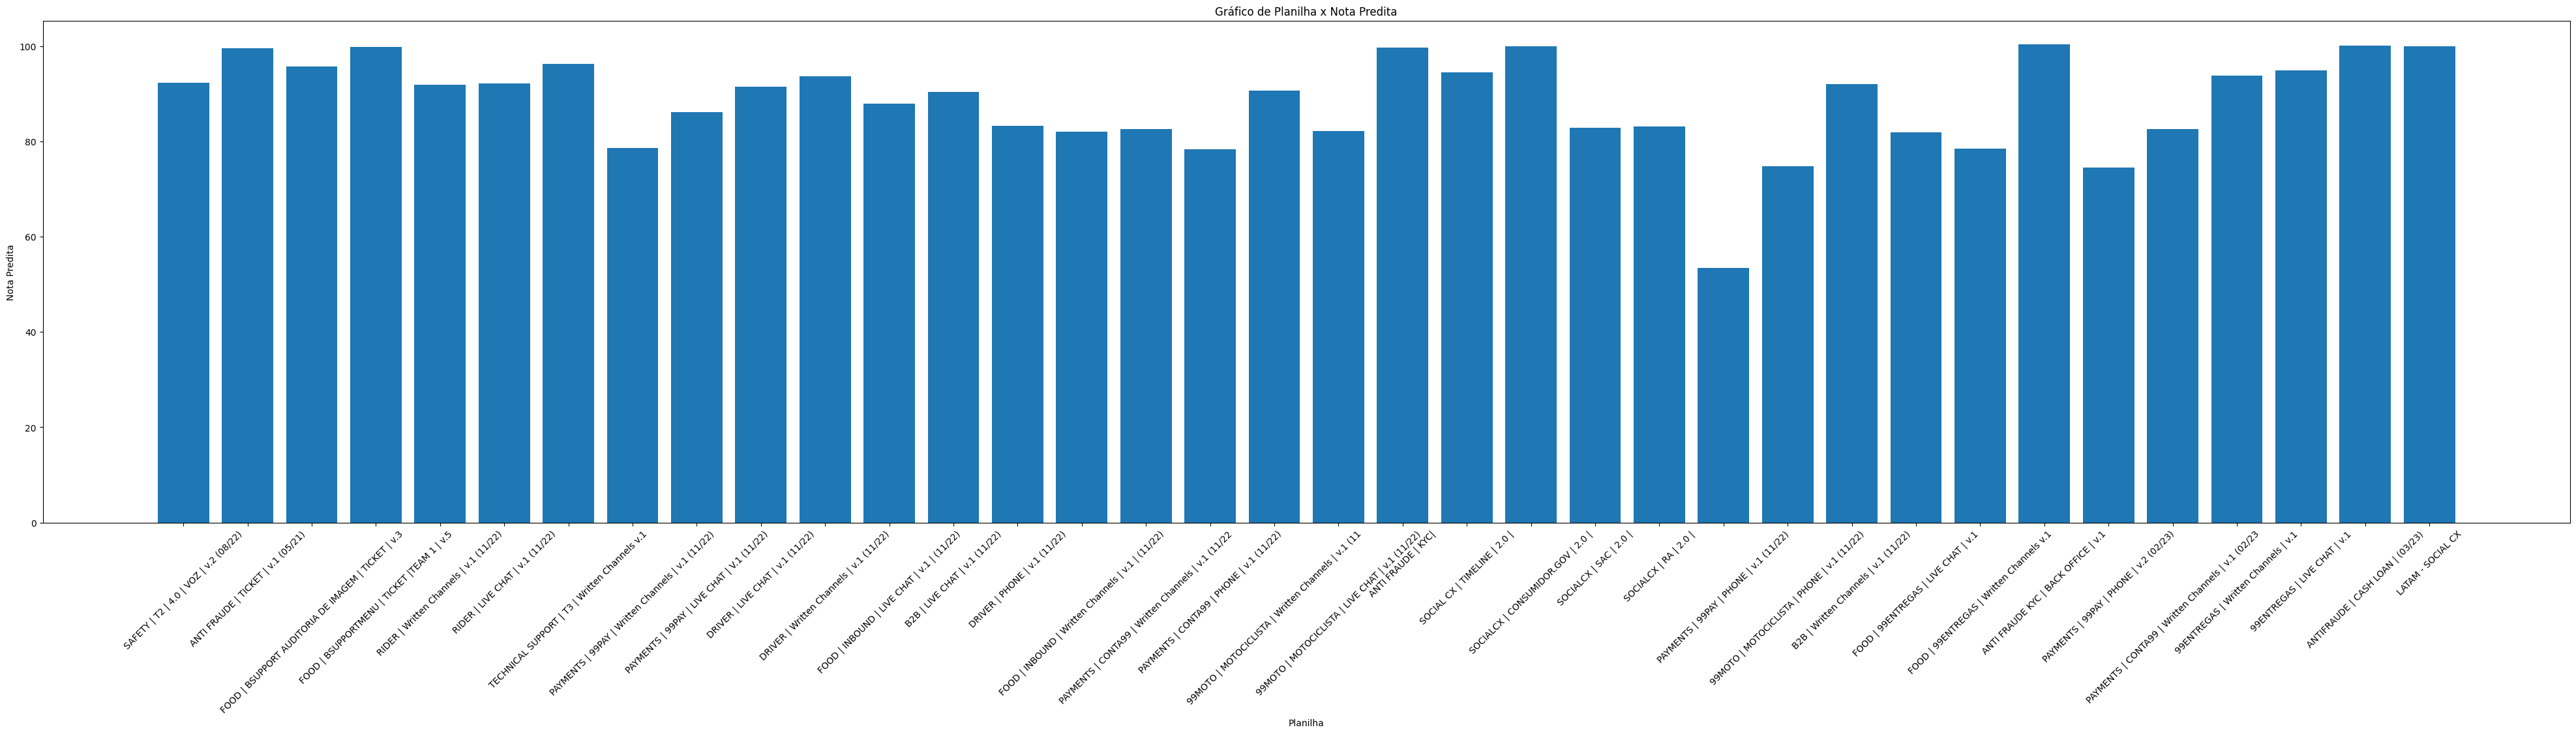

In [ ]:
import matplotlib.pyplot as plt

# Exportar df_final para um arquivo Excel
df_final.to_excel("df_final.xlsx", index=False)

# Plotar o gráfico
plt.figure(figsize=(50, 10))  # Definir o tamanho da figura
plt.bar(df_final["PLANILHA"], df_final["NOTA_PREDITA"])  # Criar um gráfico de barras
plt.xlabel("Planilha")  # Definir o rótulo do eixo x
plt.ylabel("Nota Predita")  # Definir o rótulo do eixo y
plt.title("Gráfico de Planilha x Nota Predita")  # Definir o título do gráfico
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x, se necessário

# Exibir o gráfico
plt.show()

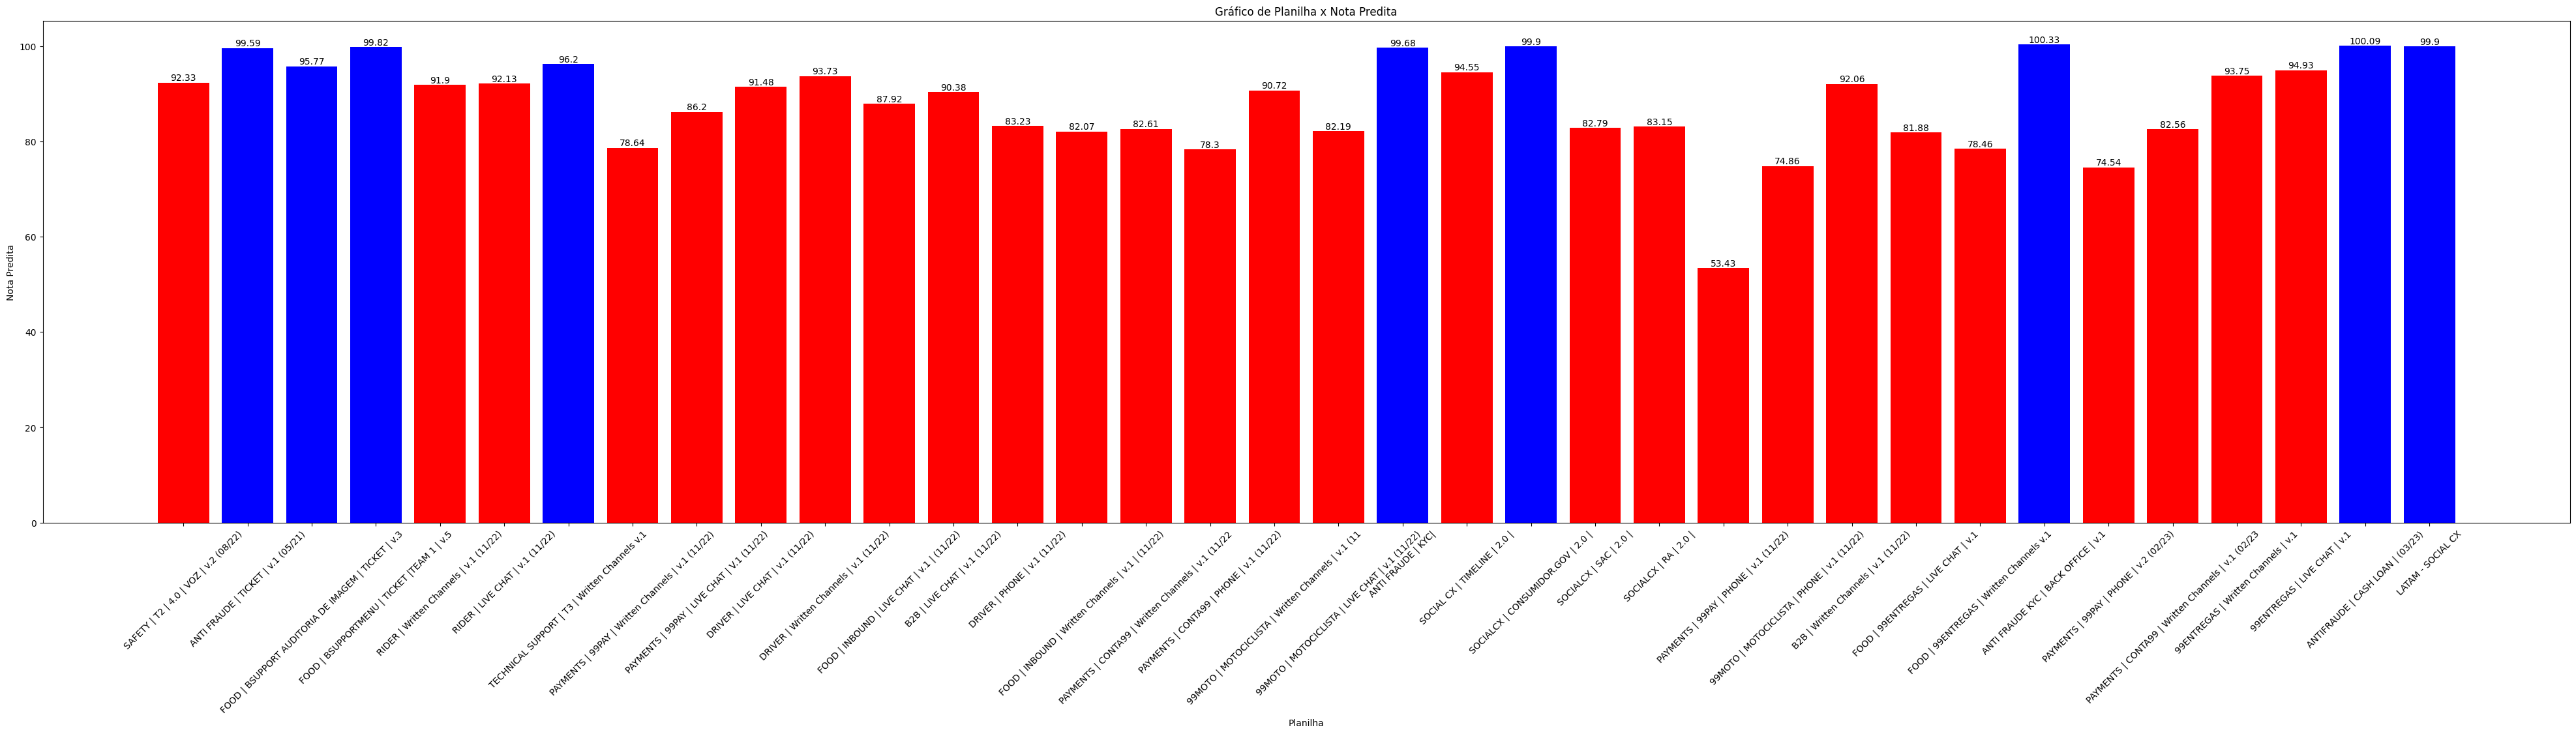

In [ ]:
import matplotlib.pyplot as plt

# Definir as cores para as notas abaixo de 95
colors = ['red' if nota < 95 else 'blue' for nota in df_final['NOTA_PREDITA']]

# Plotar o gráfico
plt.figure(figsize=(50, 10))  # Definir o tamanho da figura
bars = plt.bar(df_final["PLANILHA"], df_final["NOTA_PREDITA"], color=colors)  # Criar um gráfico de barras

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.xlabel("Planilha")  # Definir o rótulo do eixo x
plt.ylabel("Nota Predita")  # Definir o rótulo do eixo y
plt.title("Gráfico de Planilha x Nota Predita")  # Definir o título do gráfico
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x, se necessário

# Exibir o gráfico
plt.show()

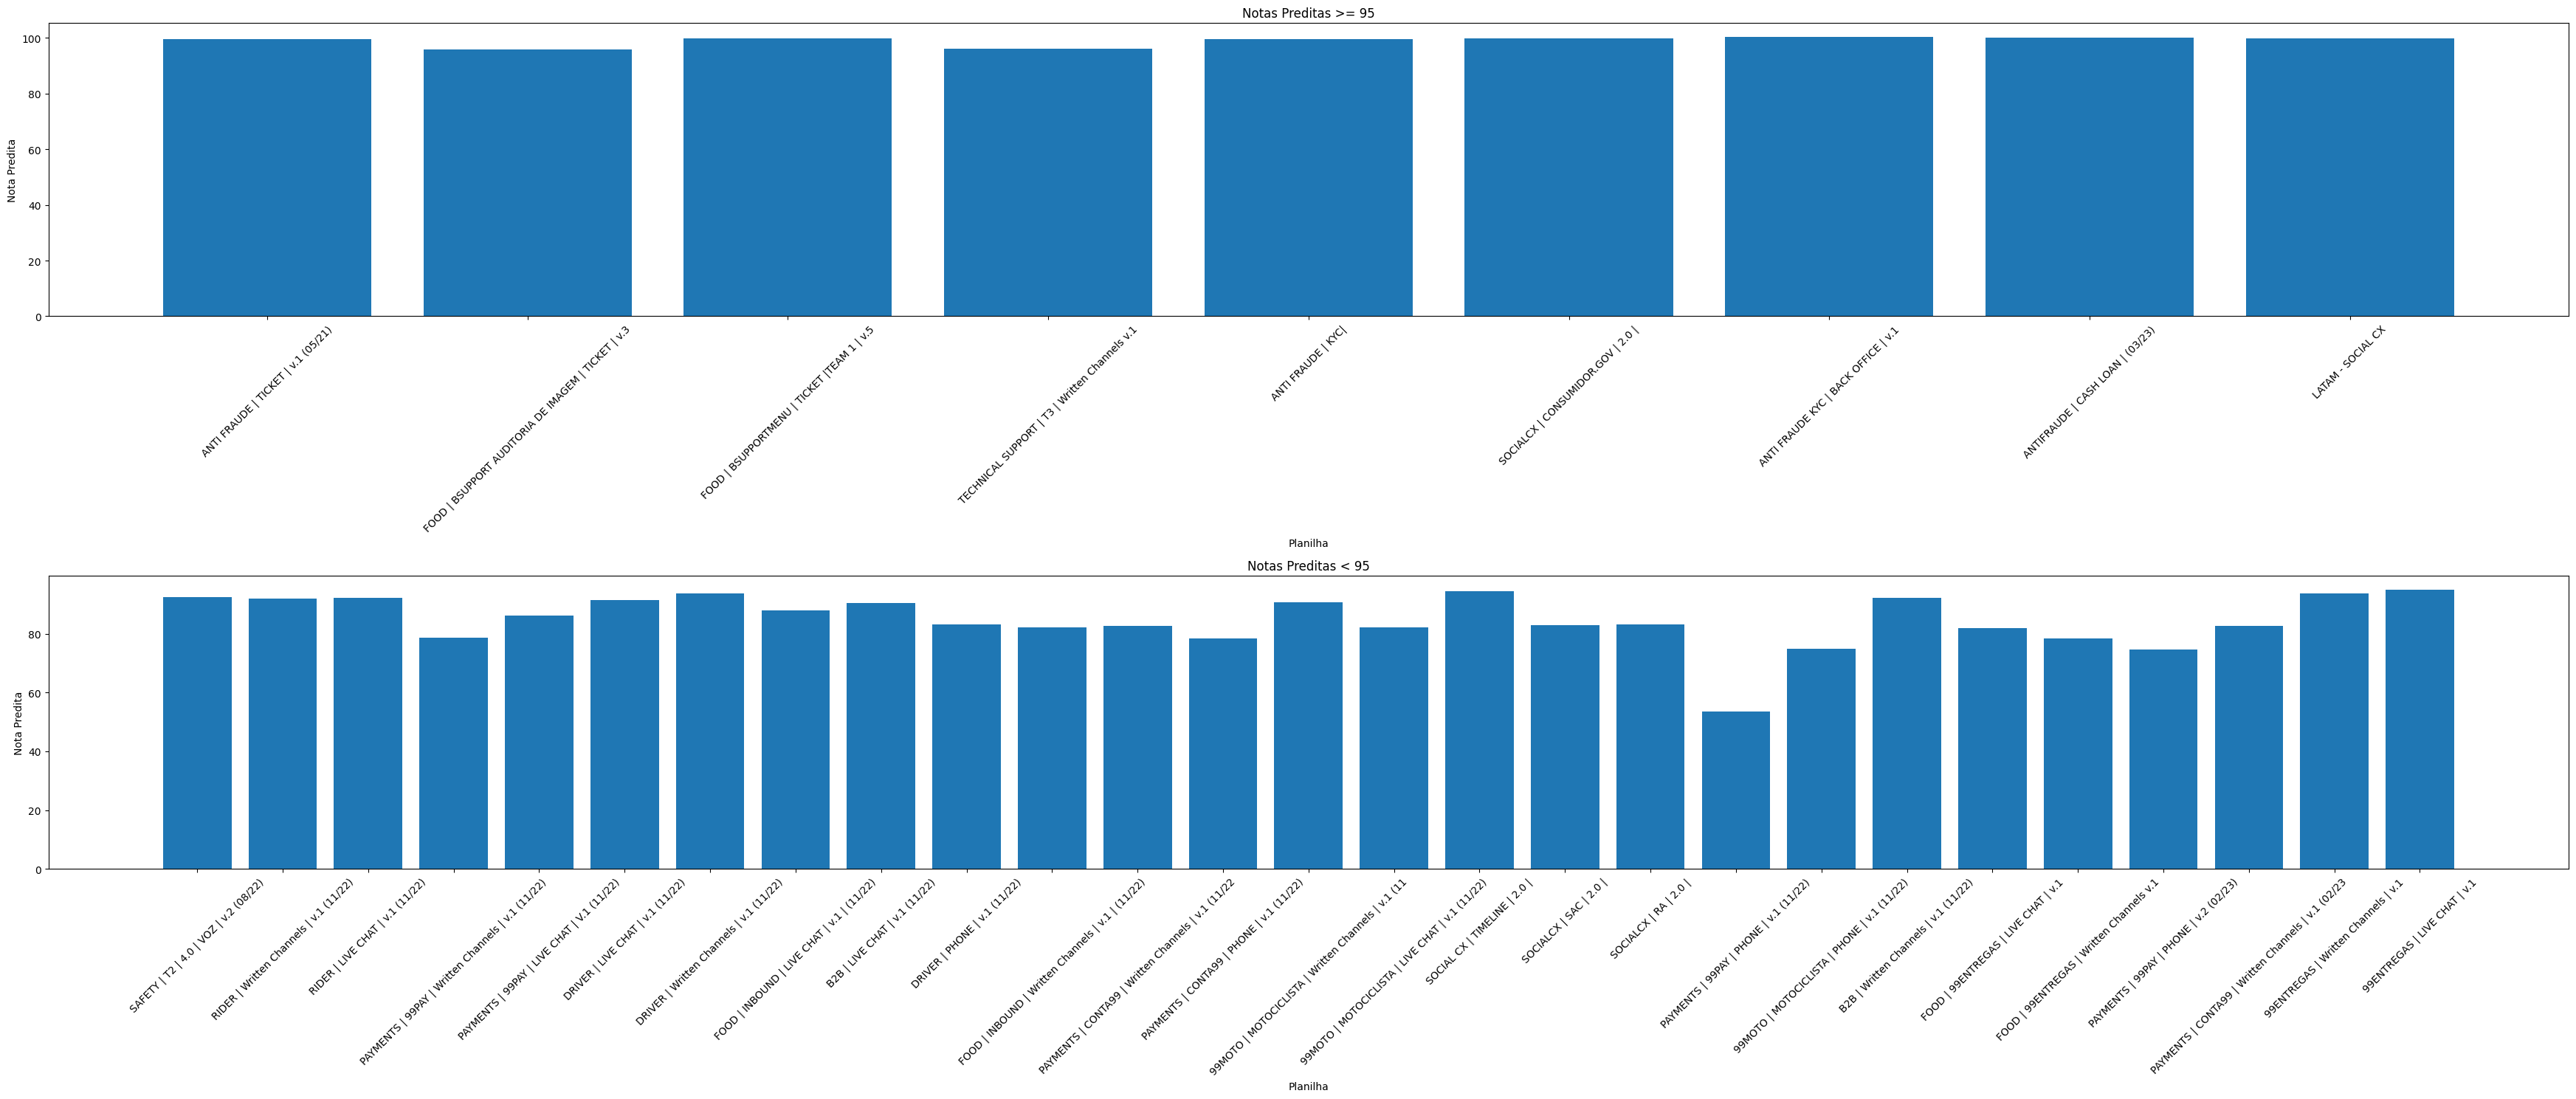

In [ ]:
import matplotlib.pyplot as plt

# Filtrar as notas maiores ou iguais a 95
df_maior_igual_95 = df_final[df_final["NOTA_PREDITA"] >= 95]

# Filtrar as notas menores ou iguais a 95
df_menor_95 = df_final[df_final["NOTA_PREDITA"] < 95]

# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(35, 15))

# Plotar o gráfico para notas maiores ou iguais a 95
ax1.bar(df_maior_igual_95["PLANILHA"], df_maior_igual_95["NOTA_PREDITA"])
ax1.set_xlabel("Planilha")
ax1.set_ylabel("Nota Predita")
ax1.set_title("Notas Preditas >= 95")
ax1.tick_params(axis='x', rotation=45)

# Plotar o gráfico para notas menores a 95
ax2.bar(df_menor_95["PLANILHA"], df_menor_95["NOTA_PREDITA"])
ax2.set_xlabel("Planilha")
ax2.set_ylabel("Nota Predita")
ax2.set_title("Notas Preditas < 95")
ax2.tick_params(axis='x', rotation=45)

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()